# loading

In [ ]:
!pip install scanpy
!pip install anndata
!pip install pyscenic
!pip install scglue
!pip install colormap
!pip install easydev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 6.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=82410ef092c9fd2c3103f5307f34aa2f0faf121bbfd4b81466571b5c733a33bc
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8046 sha256=56b54b0e6bc922698ee

In [ ]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import loompy as lp
import scglue 
import networkx as nx

In [ ]:
#绘图参数设置
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pyscenic

Pyscenic的输入是原始计数矩阵

## Loading

In [ ]:
adata = sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_anno.h5ad',compression='gzip')

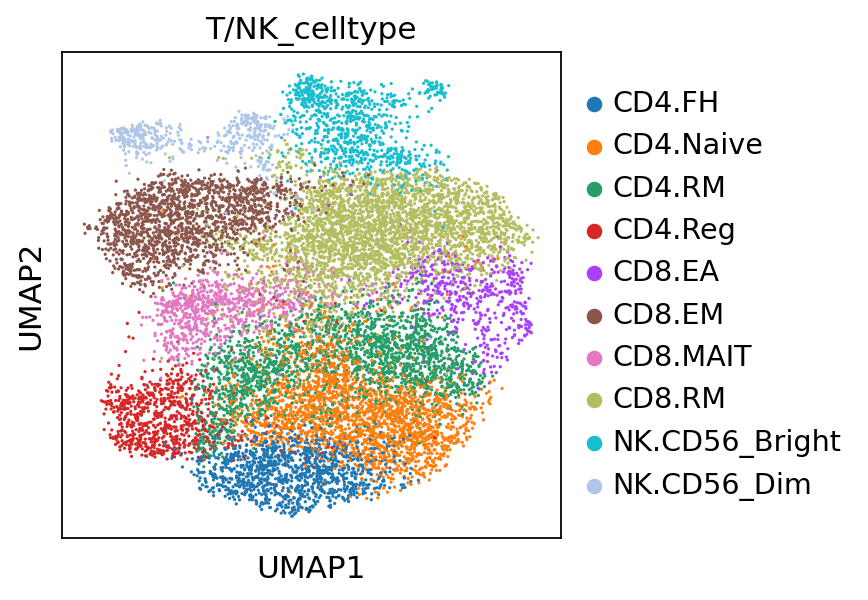

In [ ]:
sc.pl.umap(adata,color='T/NK_celltype')

In [ ]:
Origin_exp = sc.read('/content/drive/MyDrive/Gastric/Data/Gastric_Origin.h5ad')
Origin_exp

AnnData object with n_obs × n_vars = 63398 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata_new = Origin_exp[adata.obs.index]
adata_new.obs = adata.obs
adata = adata_new
adata

AnnData object with n_obs × n_vars = 14023 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sc.pp.neighbors(adata, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata,init_pos='paga')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:06)
running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


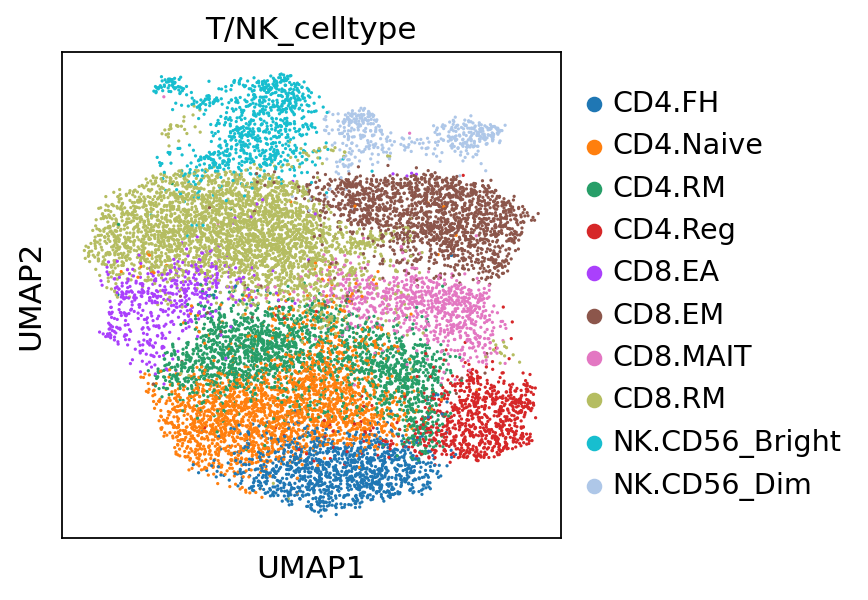

In [ ]:
sc.pl.umap(adata,color='T/NK_celltype')

In [ ]:
adata.X.todense().max()

4257.0

In [ ]:
sc.pp.filter_genes(adata, min_cells=3)
adata

filtered out 10783 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 14023 × 21776
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Group_number_colors', 'Person_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'dendrogram_Group_number', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [ ]:
adata.X.todens  e().max()

4257.0

In [ ]:
# # path to loom file with basic filtering applied (this will be created in the "initial filtering" step below). Optional.
f_loom_path_scenic = "/content/pbmc10k_filtered_scenic.loom"

In [ ]:
# create basic row and column attributes for the loom file:
row_attrs = {
    "Gene": np.array(adata.var_names) ,
}
col_attrs = {
    "CellID": np.array(adata.obs_names) ,
    "nGene": np.array( np.sum(adata.X.transpose()>0 , axis=0)).flatten() ,
    "nUMI": np.array( np.sum(adata.X.transpose() , axis=0)).flatten() ,
}
lp.create( f_loom_path_scenic, adata.X.transpose(), row_attrs, col_attrs)

## STEP 1: Gene regulatory network inference, and generation of co-expression modules


In [ ]:
!wget https://resources.aertslab.org/cistarget/tf_lists/allTFs_hg38.txt

In [ ]:
f_tfs = "/content/allTFs_hg38.txt" # human
f_tfs

In [ ]:
!pyscenic grn {f_loom_path_scenic} {f_tfs} -o /content/drive/MyDrive/Gastric/NKT/pySCENIC/adj.csv --num_workers 20

In [ ]:
adjacencies = pd.read_csv("/content/drive/MyDrive/Gastric/NKT/pySCENIC/adj.csv", index_col=False, sep=',')
adjacencies.head()


In [ ]:
adjacencies

## STEP 2-3: Regulon prediction aka cisTarget from CLI

In [ ]:
!wget https://resources.aertslab.org/cistarget/databases/homo_sapiens/hg38/refseq_r80/mc9nr/gene_based/hg38__refseq-r80__500bp_up_and_100bp_down_tss.mc9nr.genes_vs_motifs.rankings.feather

In [ ]:
!wget https://resources.aertslab.org/cistarget/databases/homo_sapiens/hg38/refseq_r80/mc9nr/gene_based/hg38__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings.feather

In [ ]:
!wget https://resources.aertslab.org/cistarget/motif2tf/motifs-v9-nr.hgnc-m0.001-o0.0.tbl

In [ ]:
import glob
# ranking databases
f_db_glob = "/content/hg38__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings.feather"
f_db_names = ' '.join( glob.glob(f_db_glob) )

# motif databases
f_motif_path = "/content/motifs-v9-nr.hgnc-m0.001-o0.0.tbl"

In [ ]:
!pyscenic ctx /content/drive/MyDrive/Gastric/NKT/pySCENIC/adj.csv \
    /content/hg38__refseq-r80__500bp_up_and_100bp_down_tss.mc9nr.genes_vs_motifs.rankings.feather \
    /content/hg38__refseq-r80__10kb_up_and_down_tss.mc9nr.genes_vs_motifs.rankings.feather \
    --annotations_fname {f_motif_path} \
    --expression_mtx_fname {f_loom_path_scenic} \
    --output /content/drive/MyDrive/Gastric/NKT/pySCENIC/reg.csv \
    --mask_dropouts \
    --num_workers 20

## STEP 4: Cellular enrichment (aka AUCell) from CLI


In [ ]:
reg = pd.read_csv("/content/drive/MyDrive/Gastric/NKT/pySCENIC/reg.csv", sep=',')
reg.head()

In [ ]:
!pyscenic aucell \
    {f_loom_path_scenic} \
    /content/drive/MyDrive/Gastric/NKT/pySCENIC/reg.csv \
    --output /content/drive/MyDrive/Gastric/NKT/pySCENIC/pyscenic_output.loom \
    --num_workers 20

# aucell

In [ ]:
import json
import zlib
import base64

# collect SCENIC AUCell output
lf = lp.connect( "/content/drive/MyDrive/Gastric/NKT/pySCENIC/pyscenic_output.loom", mode='r+', validate=False )
auc_mtx = pd.DataFrame( lf.ca.RegulonsAUC, index=lf.ca.CellID)
lf.close()

NameError: ignored

In [ ]:
# Z-score
#for col in list(auc_mtx.columns):
#    auc_mtx[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
#auc_mtx_Z.sort_index(inplace=True)

In [ ]:
auc_mtx

,AHR(+),ARID3A(+),ARID5B(+),ARNTL(+),ARNTL2(+),ASCL1(+),ASCL2(+),ATF1(+),ATF2(+),ATF3(+),...,ZNF774(+),ZNF781(+),ZNF782(+),ZNF790(+),ZNF8(+),ZNF821(+),ZNF90(+),ZNF91(+),ZSCAN16(+),ZSCAN30(+)
AAACCTGTCTAACTTC-1-HP_POS_2,0.037639,0.044989,0.025147,0.077906,0.018205,0.034530,0.000000,0.017151,0.050486,0.067032,...,0.000000,0.000000,0.000000,0.000000,0.065595,0.004692,0.030095,0.016311,0.0,0.028750
AAACGGGAGGCGCTCT-1-HP_POS_2,0.020033,0.031185,0.045258,0.000000,0.039035,0.051742,0.000000,0.027014,0.046561,0.063361,...,0.000000,0.015448,0.000000,0.031006,0.056979,0.000000,0.000000,0.025051,0.0,0.070546
AAACGGGTCGATAGAA-1-HP_POS_2,0.009465,0.010841,0.032225,0.037954,0.019966,0.033441,0.000000,0.020677,0.048907,0.059440,...,0.000000,0.033528,0.000000,0.021370,0.039274,0.000000,0.000000,0.030080,0.0,0.064495
AAAGATGAGGCATGGT-1-HP_POS_2,0.011770,0.017923,0.026964,0.066366,0.000000,0.026066,0.000000,0.017429,0.041807,0.051637,...,0.000000,0.000000,0.000000,0.034317,0.046918,0.000000,0.000000,0.025237,0.0,0.054411
AAAGATGCAGGCTCAC-1-HP_POS_2,0.000000,0.009992,0.023987,0.000000,0.000000,0.015069,0.000000,0.000000,0.032710,0.077801,...,0.000103,0.000000,0.000000,0.042556,0.037749,0.000000,0.000000,0.026832,0.0,0.063337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCGAAGCACTCAGGC-1-HP_NEG_2,0.003237,0.023344,0.029585,0.024474,0.014053,0.028730,0.001330,0.034461,0.046395,0.036504,...,0.023584,0.000000,0.000000,0.021627,0.050642,0.000000,0.000000,0.031464,0.0,0.054755
TTCTTAGTCAACCATG-1-HP_NEG_2,0.010250,0.000000,0.016440,0.012146,0.022890,0.031677,0.006909,0.000000,0.037962,0.063716,...,0.000000,0.002632,0.000000,0.033581,0.039075,0.000000,0.000000,0.034782,0.0,0.042825
TTGCCGTAGAATTCCC-1-HP_NEG_2,0.000000,0.027445,0.049284,0.002666,0.070031,0.026339,0.000000,0.000356,0.034003,0.061859,...,0.019053,0.065225,0.000000,0.000000,0.047730,0.000000,0.000000,0.032071,0.0,0.087882
TTGCGTCGTTCGCTAA-1-HP_NEG_2,0.040876,0.003541,0.030447,0.026686,0.008737,0.021450,0.000000,0.015052,0.035982,0.051945,...,0.000000,0.000000,0.028368,0.000000,0.026044,0.000000,0.000000,0.030261,0.0,0.076253


In [ ]:
adata = sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_anno.h5ad',compression='gzip')

In [ ]:
adata.obs

,Person,Sample,n_genes,doublet_score,predicted_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,_scvi_batch,_scvi_labels,leiden,major_celltype,T/NK_celltype,T/NK_type
AAACCTGTCTAACTTC-1-HP_POS_2,HP_POS_2,POS,3252,0.015161,False,3252,10150.0,451.0,4.443350,1,0,8,NK/T cell,CD8.T.MAIT,CD8
AAACGGGAGGCGCTCT-1-HP_POS_2,HP_POS_2,POS,1472,0.033851,False,1472,3025.0,133.0,4.396694,1,0,0,NK/T cell,CD8.T.Tissue_Resident_Memory,CD8
AAACGGGTCGATAGAA-1-HP_POS_2,HP_POS_2,POS,2528,0.005439,False,2528,6318.0,39.0,0.617284,1,0,6,NK/T cell,NK.CD56_bright,NK
AAAGATGAGGCATGGT-1-HP_POS_2,HP_POS_2,POS,3372,0.009850,False,3372,10124.0,416.0,4.109048,1,0,11,NK/T cell,CD8.T.Exhausted,CD8
AAAGATGCAGGCTCAC-1-HP_POS_2,HP_POS_2,POS,4888,0.064330,False,4888,17984.0,524.0,2.913701,1,0,6,NK/T cell,NK.CD56_bright,NK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCGAAGCACTCAGGC-1-HP_NEG_2,HP_NEG_2,NEG,818,0.130719,False,818,1560.0,26.0,1.666667,1,0,5,NK/T cell,CD8.T.Tissue_Resident_Memory,CD8
TTCTTAGTCAACCATG-1-HP_NEG_2,HP_NEG_2,NEG,2496,0.038961,False,2496,5373.0,131.0,2.438117,1,0,5,NK/T cell,CD8.T.Tissue_Resident_Memory,CD8
TTGCCGTAGAATTCCC-1-HP_NEG_2,HP_NEG_2,NEG,2066,0.069465,False,2066,4767.0,234.0,4.908748,1,0,5,NK/T cell,CD8.T.Tissue_Resident_Memory,CD8
TTGCGTCGTTCGCTAA-1-HP_NEG_2,HP_NEG_2,NEG,1282,0.199063,False,1282,2644.0,41.0,1.550681,1,0,5,NK/T cell,CD8.T.Tissue_Resident_Memory,CD8


In [ ]:
sc.pp.neighbors(adata, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata,init_pos='paga')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


In [ ]:
sc_auc_mtx = sc.AnnData(X=auc_mtx)
sc_auc_mtx.var_names =  auc_mtx.columns
sc_auc_mtx.obs = adata.obs

<ipython-input-12-16614257b417>:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sc_auc_mtx = sc.AnnData(X=auc_mtx)


In [ ]:
sc_auc_mtx.obsm = adata.obsm

In [ ]:
sc_auc_mtx.write('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_TF.h5ad',compression='gzip')

# aucell downstream analysis

In [ ]:
auc_mtx

NameError: ignored

In [ ]:
auc_adata=sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_TF.h5ad')

In [ ]:
auc_adata.obs['leiden']=adata.obs['leiden']

# create a dictionary to map cluster to annotation label
cluster2annotation = {
    '8': 'CD8.T.MAIT',
    '4': 'CD8.T.Effector_Memory',
    '0': 'Pos_CD8.T.Tissue_Resident_Memory',
    '5': 'Neg_CD8.T.Tissue_Resident_Memory',
    '11': 'CD8.T.Exhausted',
    '9': 'CD8.T.Early_Activated'
}
auc_adata.obs['T/NK_celltype'] = adata_CD8.obs['leiden'].map(cluster2annotation).astype('category')

NameError: ignored

In [ ]:
sc.tl.rank_genes_groups(auc_adata, 'T/NK_celltype',use_rep='X', method='wilcoxon',use_raw=False)
sc.tl.dendrogram(auc_adata, groupby='T/NK_celltype')

In [ ]:
auc_adata.obs

In [ ]:
sc.tl.dendrogram(auc_adata, groupby='T/NK_celltype')
sc.pl.rank_genes_groups_dotplot(auc_adata ,groupby='T/NK_celltype',n_genes=5 ,standard_scale='var'
                                ,color_map="RdBu_r",)

In [ ]:
sc.pl.umap(auc_adata,color=['MAF(+)','T/NK_celltype'])

以上结果证实，PRDM1可能通过上调PD-L1的表达促进肿瘤免疫逃逸，进而抑制其本身的抗肿瘤作用。

抗原驱动的 EGR2表达是耗尽的 CD8 + T 细胞稳定性和维持所必需的

Antigen-driven EGR2 expression is required for exhausted CD8+ T cell stability and maintenance（Nature communication）

https://www.nature.com/articles/s41467-021-23044-9

In [ ]:
grn = scglue.genomics.read_ctx_grn("/content/drive/MyDrive/Gastric/NKT/pySCENIC/reg.csv")
grn

In [ ]:
draft_grn = pd.read_csv('/content/drive/MyDrive/Gastric/NKT/pySCENIC/adj.csv')
draft_grn

In [ ]:
sc_color=['#7CBB5F','#368650','#A499CC','#5E4D9A','#78C2ED','#866017','#9F987F', '#E0DFED', '#EF7B77', '#279AD7',
 '#F0EEF0', '#1F577B', '#A56BA7', '#E0A7C8', '#E069A6', '#941456', '#FCBC10', '#EAEFC5', '#01A0A7', '#75C8CC', 
'#F0D7BC', '#D5B26C', '#D5DA48', '#B6B812','#9DC3C3', '#A89C92', '#FEE00C','#FEF2A1']
from colormap import Colormap
c = Colormap()
rnacmap = c.cmap_linear( '#ffffff','#de0029','#a51616')
nodecmap= c.cmap_linear( '#a51616','#ffffff',sc_color[11])

import matplotlib.pyplot as plt
def plot_sub_nodes(grn,goal_node,limit):
    
    tf = draft_grn.loc[draft_grn.loc[:,'TF']==goal_node].sort_values(['importance'],ascending=False)[:limit] #导入前20个调控的基因

    tf_list = ['MAF'] + tf['target'].tolist() #导入基因list
    
    sub_grn = nx.Graph()  #生成图
    sub_grn.add_nodes_from(tf['target'].tolist()) #添加节点

    importance = [] #添加边
    for i in range(len(tf.index)):
        importance.append((tf.iloc[i,0],tf.iloc[i,1]))
    sub_grn.add_edges_from(importance) #添加边信息
    
    edge_dict={}
    for i in sub_grn.edges():
        edge_dict[i]={"weight":tf.query("`TF` == '{}' and `target` == '{}'".format(i[1],i[0]))['importance'].values[0]}
    nx.set_edge_attributes(sub_grn,edge_dict)


    fig, ax = plt.subplots(figsize=(4,4)) 
    pos = nx.spring_layout(sub_grn,k=3)

    p=dict(sub_grn.nodes)
    for i in p.keys():
        if i ==goal_node:
            p[i]=0
        else:
            p[i]=1


    nx.draw_networkx_nodes(sub_grn, pos, nodelist=p,cmap=nodecmap,
                           node_color=list(p.values()))

    edgewidth = [sub_grn.get_edge_data(u, v)['weight']/10 for u, v in sub_grn.edges()]
    nx.draw_networkx_edges(sub_grn, pos,width=edgewidth)


    label_options = {"ec": "white", "fc": "white", "alpha": 0.6}
    nx.draw_networkx_labels(sub_grn, pos, font_size=10, bbox=label_options)

    plt.grid(False)
    plt.axis("off")
    plt.xlim(-1.3,1.3)

In [ ]:
goal_node='MAF'
limit=20
plot_sub_nodes(grn,goal_node,limit)